In [7]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
wine = pd.read_csv('white_wine.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


In [6]:
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace = True)
wine['label'] = np.where(wine['quality']>6,1,0)

X = wine[['density','alcohol']]
Y = wine['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split ( X, Y, stratify = Y, random_state = 10 )

In [9]:
# model tanpa polynomial

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [11]:
y_pred = logreg.predict(X_test)
print('accuracy : ',accuracy_score(y_test,y_pred))

accuracy :  0.8538461538461538


In [13]:
# Model dengan polynomial

poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [14]:
X_train_poly

array([[9.94000000e-01, 1.01194605e+01, 9.88036000e-01, ...,
        9.99839128e+00, 1.01789060e+02, 1.03626798e+03],
       [9.98000000e-01, 9.60000000e+00, 9.96004000e-01, ...,
        9.56163840e+00, 9.19756800e+01, 8.84736000e+02],
       [9.97400000e-01, 8.70000000e+00, 9.94806760e-01, ...,
        8.65481881e+00, 7.54932060e+01, 6.58503000e+02],
       ...,
       [9.94200000e-01, 9.10000000e+00, 9.88433640e-01, ...,
        8.99474612e+00, 8.23297020e+01, 7.53571000e+02],
       [9.98100000e-01, 1.00000000e+01, 9.96203610e-01, ...,
        9.96203610e+00, 9.98100000e+01, 1.00000000e+03],
       [9.96200000e-01, 1.20000000e+01, 9.92414440e-01, ...,
        1.19089733e+01, 1.43452800e+02, 1.72800000e+03]])

In [15]:
X_test_poly

array([[9.92100000e-01, 1.00000000e+01, 9.84262410e-01, ...,
        9.84262410e+00, 9.92100000e+01, 1.00000000e+03],
       [1.00080000e+00, 9.70000000e+00, 1.00160064e+00, ...,
        9.71552621e+00, 9.41652720e+01, 9.12673000e+02],
       [9.99900000e-01, 8.60000000e+00, 9.99800010e-01, ...,
        8.59828009e+00, 7.39526040e+01, 6.36056000e+02],
       ...,
       [9.91400000e-01, 1.08000000e+01, 9.82873960e-01, ...,
        1.06150388e+01, 1.15636896e+02, 1.25971200e+03],
       [9.92400000e-01, 9.60000000e+00, 9.84857760e-01, ...,
        9.45463450e+00, 9.14595840e+01, 8.84736000e+02],
       [9.95100000e-01, 1.00000000e+01, 9.90224010e-01, ...,
        9.90224010e+00, 9.95100000e+01, 1.00000000e+03]])

In [16]:
poly.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']

In [17]:
pd.DataFrame(X_train_poly, columns=poly.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3
0,0.9940,10.119461,0.988036,10.058744,102.403481,0.982108,9.998391,101.789060,1036.267979
1,0.9980,9.600000,0.996004,9.580800,92.160000,0.994012,9.561638,91.975680,884.736000
2,0.9974,8.700000,0.994807,8.677380,75.690000,0.992220,8.654819,75.493206,658.503000
3,0.9927,9.500000,0.985453,9.430650,90.250000,0.978259,9.361806,89.591175,857.375000
4,1.0000,9.000000,1.000000,9.000000,81.000000,1.000000,9.000000,81.000000,729.000000
...,...,...,...,...,...,...,...,...,...
385,0.9983,11.500000,0.996603,11.480450,132.250000,0.994909,11.460933,132.025175,1520.875000
386,0.9941,10.000000,0.988235,9.941000,100.000000,0.982404,9.882348,99.410000,1000.000000
387,0.9942,9.100000,0.988434,9.047220,82.810000,0.982701,8.994746,82.329702,753.571000
388,0.9981,10.000000,0.996204,9.981000,100.000000,0.994311,9.962036,99.810000,1000.000000


In [19]:
logreg = LogisticRegression()
logreg.fit(X_train_poly,y_train)
y_pred = logreg.predict(X_test_poly)
print('accuracy poly : ',accuracy_score(y_test,y_pred))

accuracy poly :  0.9307692307692308


In [21]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_poly,y_train)
y_pred = logreg.predict(X_test_poly)
print('accuracy poly : ',accuracy_score(y_test,y_pred))

accuracy poly :  0.9307692307692308


C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol', ylabel='label'>

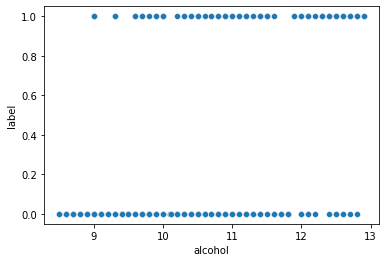

In [22]:
import seaborn as sns

sns.scatterplot(wine['alcohol'],wine['label'])